In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [370]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

In [371]:
# load data
df = pd.read_csv('nhis_00012.csv')

In [372]:
(df['HIP1COST']>0).sum()

np.int64(17170)

In [373]:
df.head()
df = df.loc[(df['HIPRIVATEE'].isin([2,3])) & (df['ASTATFLG']==1)]
df.drop(columns=['NHISHID','NHISPID','SAMPWEIGHT','HIPRIVATEE','ASTATFLG','DVINTWELL','HINOTYR','HINOTCOVE','HICHIPE'],inplace=True)

In [374]:
df['HIP1COST']

0         2400
1         3000
6        99999
10        3250
13        7200
         ...  
35105        0
35106     4800
35108    99999
35109     1350
35111     3600
Name: HIP1COST, Length: 16993, dtype: int64

## Recoding Variables
For readibility, we 

In [375]:
# recode HIMCAIDE
df['HIMCAIDE'] = df['HIMCAIDE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAIDE'].isin([1, 2, 3]), np.nan).astype('Int64')

# recode HIMCAIRE
df['HIMCAREE'] = df['HIMCAREE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAREE'].isin([1, 2, 3]), np.nan).astype('Int64')

There's a couple of variables which are quite weird because of them existing in different universes. In order to consolidate certain variables and deal with missing values, we changed variables which represented questions asked in different universes

In [376]:
# recode REGION
df['REGION'] = df['REGION'].replace({1: 'Northeast', 2: 'North Central/Midwest', 3: 'South', 4: 'West'})

# recode SEX
df['SEX'] = df['SEX'].astype(object)
df.loc[df['SEX'].isin([7, 8, 9]), 'SEX'] = np.nan
df.loc[df['SEX'] == 1, 'SEX'] = 'Male'
df.loc[df['SEX'] == 2, 'SEX'] = 'Female'

# recode AGE
df.loc[df['AGE'].isin([997,998,999]), 'AGE'] = np.nan

# recode MARSTCUR
df['MARSTCUR'] = df['MARSTCUR'].astype(object)
df.loc[df['MARSTCUR'].isin([0, 9]), 'MARSTCUR'] = np.nan
df.loc[df['MARSTCUR'] == 1, 'MARSTCUR'] = 'Married, spouse present'
df.loc[df['MARSTCUR'] == 2, 'MARSTCUR'] = 'Married, spouse absent'
df.loc[df['MARSTCUR'] == 3, 'MARSTCUR'] = 'Married, spouse in household unknown'
df.loc[df['MARSTCUR'] == 4, 'MARSTCUR'] = 'Separated'
df.loc[df['MARSTCUR'] == 5, 'MARSTCUR'] = 'Divorced'
df.loc[df['MARSTCUR'] == 6, 'MARSTCUR'] = 'Widowed'
df.loc[df['MARSTCUR'] == 7, 'MARSTCUR'] = 'Living with partner'
df.loc[df['MARSTCUR'] == 8, 'MARSTCUR'] = 'Never Married'

# recode RACENEW
df['RACENEW'] = df['RACENEW'].astype(object)
df.loc[df['RACENEW'] == 100, 'RACENEW'] = 'White'
df.loc[df['RACENEW'] == 200, 'RACENEW'] = 'Black/African American'
df.loc[df['RACENEW'] == 542, 'RACENEW'] = 'American Indian/Alaska Native and Any Other Race'
df.loc[df['RACENEW'] == 400, 'RACENEW'] = 'Asian only'
df.loc[df['RACENEW'] == 300, 'RACENEW'] = 'American Indian/Alaska Native only'
df.loc[df['RACENEW'].isin([510, 997, 998, 999]), 'RACENEW'] = 'Other Race and Multiple Race' 

# recode CITIZEN
df['CITIZEN'] = df['CITIZEN'].astype(object)
df.loc[df['CITIZEN'] == 1, 'CITIZEN'] = 0
df.loc[df['CITIZEN'] == 2, 'CITIZEN'] = 1
df.loc[df['CITIZEN'].isin([7, 8, 9]), 'CITIZEN'] = np.nan

# recode ARMFEV
df['ARMFEV'] = df['ARMFEV'].astype(object)
df.loc[df['ARMFEV'] == 0, 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 11, 'ARMFEV'] = 0
df.loc[df['ARMFEV'] == 20, 'ARMFEV'] = 1
df.loc[df['ARMFEV'].isin([98, 99, 97]), 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 12, 'ARMFEV'] = 0


In [377]:
# recode EDUC
df['EDUC'] = df['EDUC'].astype(object)
df.loc[df['EDUC'] == 201, 'EDUC'] = 'High School Graduate'
df.loc[df['EDUC'] == 301, 'EDUC'] = 'Some college, no degree'
df.loc[df['EDUC'] == 0, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 505, 'EDUC'] = 'Professional School or Doctoral degree, topcoded (MD, DDS, DVM, JD, PhD, EdD)'
df.loc[df['EDUC'] == 303, 'EDUC'] = 'AA degree: academic program'
df.loc[df['EDUC'] == 400, 'EDUC'] = "Bachelor's degree (BA,AB,BS,BBA)"
df.loc[df['EDUC'] == 202, 'EDUC'] = 'GED or equivalent'
df.loc[df['EDUC'] == 103, 'EDUC'] = 'Grades 1-11 (no further detail)'
df.loc[df['EDUC'] == 501, 'EDUC'] = "Master's degree (MA,MS,Med,MBA)"
df.loc[df['EDUC'] == 302, 'EDUC'] = 'AA degree: technical/vocational/occupational'
df.loc[df['EDUC'] == 116, 'EDUC'] = '12th grade, no diploma'
df.loc[df['EDUC'] == 999, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 997, 'EDUC'] = np.nan

In [378]:
# recode POVERTY
df['POVERTY'] = df['POVERTY'].astype(object)
df.loc[df['POVERTY'] == 11, 'POVERTY'] = 'Under 0.50'
df.loc[df['POVERTY'] == 12, 'POVERTY'] = '0.50 to 0.74'
df.loc[df['POVERTY'] == 13, 'POVERTY'] = '0.75 to 0.99'
df.loc[df['POVERTY'] == 21, 'POVERTY'] = '1.00 to 1.24'
df.loc[df['POVERTY'] == 22, 'POVERTY'] = '1.25 to 1.49'
df.loc[df['POVERTY'] == 23, 'POVERTY'] = '1.50 to 1.74'
df.loc[df['POVERTY'] == 24, 'POVERTY'] = '1.75 to 1.99'
df.loc[df['POVERTY'] == 31, 'POVERTY'] = '2.00 to 2.49'
df.loc[df['POVERTY'] == 32, 'POVERTY'] = '2.50 to 2.99'
df.loc[df['POVERTY'] == 33, 'POVERTY'] = '3.00 to 3.49'
df.loc[df['POVERTY'] == 34, 'POVERTY'] = '3.50 to 3.99'
df.loc[df['POVERTY'] == 35, 'POVERTY'] = '4.00 to 4.49'
df.loc[df['POVERTY'] == 36, 'POVERTY'] = '4.50 to 4.99'
df.loc[df['POVERTY'] == 37, 'POVERTY'] = '5.00 and over'

In [379]:
# recode EMPSTAT
df['EMPSTAT'] = df['EMPSTAT'].astype(object)
df.loc[df['EMPSTAT'] == 100, 'EMPSTAT'] = 'Employed'
df.loc[df['EMPSTAT'] == 0, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 200, 'EMPSTAT'] = 'Not Employed'
df.loc[df['EMPSTAT'] == 999, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 'Not Employed', 'EMPSTAT'] = 0
df.loc[df['EMPSTAT'] == 'Employed', 'EMPSTAT'] = 1

In [380]:
df.loc[df['HOURSWRK'].isin([97, 98, 99]), 'HOURSWRK'] = np.nan

In [381]:
# recode GOTRET
df['GOTRET'] = df['GOTRET'].astype(object)
df.loc[df['GOTRET'] == 2, 'GOTRET'] = 'SSDI'
df.loc[df['GOTRET'] == 1, 'GOTRET'] = 'SSI'
df.loc[df['GOTRET'].isin([9, 0, 7, 8]), 'GOTRET'] = np.nan

In [382]:
# recode POVERTY
# recode 

In [383]:
# recode HEALTH
df['HEALTH'] = df['HEALTH'].astype(object)
df.loc[df['HEALTH'] == 3, 'HEALTH'] = 'Good'
df.loc[df['HEALTH'] == 2, 'HEALTH'] = 'Very Good'
df.loc[df['HEALTH'] == 1, 'HEALTH'] = 'Excellent'
df.loc[df['HEALTH'] == 4, 'HEALTH'] = 'Fair'
df.loc[df['HEALTH'] == 5, 'HEALTH'] = 'Poor'
df.loc[df['HEALTH'].isin([7, 9]), 'HEALTH'] = np.nan

In [384]:
df['DVINT'] = df['DVINT'].replace({
    100: 'Never',
    200: 'Less than 1 year',
    201: 'Visits in the past 2 weeks',
    202: '2 weeks to less than 6 months',
    203: 'Under 6 months',
    204: '6 months to less than 12 months',
    300: '1 year or more',
    301: '1 year',
    302: '1 year to less than 2 years',
    303: '1 year to less than 3 years',
    304: '2 years to less than 3 years',
    305: '2 years to less than 5 years',
    306: '2 years',
    307: '2 to 4 years',
    308: '3 to 4 years',
    309: '3 years to less than 5 years',
    310: 'More than 3 years',
    400: '5 years or more',
    401: '5 to 9 years',
    402: 'More than 10 years'
}).where(df['DVINT'].isin(range(100,403)), np.nan)

df['URGCAREYRNO'] = df['URGCAREYRNO'].replace({
    0: '0 times',
    1: '1 time',
    2: '2 times',
    3: '3 times',
    4: '4 times',
    5: '5+ times',
}).where(df['URGCAREYRNO'].isin(range(0,6)), np.nan)

df['ERYRNO'] = df['ERYRNO'].replace({
    10: 'No visits',
    20: '1 visit',
    30: '2 to 3 visits',
    31: '2 visits',
    32: '3 visits',
    40: '4 or more visits',
    41: '4 to 9 visits',
    42: '4 to 5 visits',
    43: '6 to 7 visits',
    44: '8 to 9 visits',
    45: '10 to 12 visits',
    46: '13 or more visits',
    47: '13 to 15 visits',
    48: '16 or more visits'
}).where(df['ERYRNO'].isin(range(10,49)), np.nan)

df['WORMEDBILL'] = df['WORMEDBILL'].replace({
    1: 'Very worried',
    2: 'Somewhat worried',
    3: 'Not at all worried'
}).where(df['WORMEDBILL'].isin(range(1,4)), np.nan)


df['HIMILITE'] = np.select(
    [df['HIMILITE'] == 10, df['HIMILITE'].isin(range(20, 26))],
    [0, 1],
    default=np.nan
)

df['GOTWELF'] = np.select(
    [df['GOTWELF'] == 21, df['GOTWELF']==10],
    [0, 1],
    default=np.nan
)


In [385]:
# change vars values from 1,2 to 0,1
def replace_yes_no(column):
    return column.replace({1: 0, 2: 1}).where(column.isin([1, 2]), np.nan).astype('Int64')

cols_to_replace = ['MDEXUPADV','ARTHGLUPEV', 'ASTHMAEV', 'HOSPNGHT','THERAPYR','SAWMENT',
                   'DELAYCOST', 'DELAYINS','YDELAYMEDYR','YSKIMPMEDYR','YSKIPMEDYR', 'HIPROBPAYR',
                    'EMPHI','CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV', 'DEMENTIAEV',
                   'DEPRESSEV', 'DIABETICEV','HEARTATTEV', 'HYPERTENEV','STROKEV', 'COPDEV',
                   'IMSPCHC', 'HRAUSES','GLASSLENS','CANCEREV']
df[cols_to_replace] = df[cols_to_replace].apply(replace_yes_no)



In [386]:
df['EMPHI'] = df['EMPHI'].apply(lambda x: 1 if x == 2 else 0)


In [387]:
# recode ALCANYTP
df['ALCANYTP'] = df['ALCANYTP'].replace({
    1: 'Every day',
    2: 'Week',
    3: 'Month',
    4: 'Year',
    5: 'Never/None'
}).where(df['ALCANYTP'].isin(range(1,6)), np.nan)

df['ALCANYTP'] = df['ALCANYTP'].fillna(0)

# recode SMOKFREQNOW
df['SMOKFREQNOW'] = df['SMOKFREQNOW'].replace({
    1: 'Not at all',
    2: 'Some days',
    3: 'Every day',
}).where(df['SMOKFREQNOW'].isin(range(1,4)), np.nan)

df['SMOKFREQNOW'] = df['SMOKFREQNOW'].fillna(0)
df['YSKIMPMEDYR'] = df['YSKIMPMEDYR'].fillna(0)
df['YSKIPMEDYR'] = df['YSKIPMEDYR'].fillna(0)
df['YDELAYMEDYR'] = df['YDELAYMEDYR'].fillna(0)

# recode LAMTWRK
df['LAMTWRK'] = df['LAMTWRK'].replace({
    1: 'Not limited in work',
    2: 'Limited in kind/amt of work',
    3: 'Unable to work',
}).where(df['LAMTWRK'].isin(range(1,4)), np.nan)

df = df[df['BMICALC'] != 996]
df = df[~df['GOTSSISSDI'].isin([7, 8, 9])]


In [388]:
df.isna().sum().sort_values(ascending=False)

GOTRET          682
GOTWELF         660
CITIZEN         608
MARSTCUR        602
ARMFEV          594
EMPSTAT         583
MDEXUPADV       422
SAWMENT         239
THERAPYR        193
URGCAREYRNO     114
DELAYINS        113
ERYRNO          104
DVINT           100
HOSPNGHT         97
DELAYCOST        93
WORMEDBILL       59
HIPROBPAYR       56
EDUC             52
IMSPCHC          45
CHOLHIGHEV       39
CHEARTDIEV       35
HOURSWRK         27
AGE              27
DEPRESSEV        24
ARTHGLUPEV       22
HEARTATTEV       20
CHRFATIGEV       18
HYPERTENEV       18
STROKEV          17
COPDEV           15
CANCEREV         15
DIABETICEV       13
ASTHMAEV         11
LAMTWRK          11
DEMENTIAEV       10
GLASSLENS         6
HEALTH            3
HRAUSES           2
ALCANYTP          0
SMOKFREQNOW       0
REGION            0
HIP2COST          0
HIP1COST          0
HIMCAREE          0
HIMCAIDE          0
HIMILITE          0
YSKIPMEDYR        0
YSKIMPMEDYR       0
YDELAYMENTAL      0
BMICALC           0


In [389]:
num_samples = df.shape[0]

# replacing "Unknown-refused", "Unknown-not ascertained", and "Unknown-don't know" responses with N/A
df.loc[df['HIP1COST'].isin([99997,99998,99999]),'HIP1COST'] = np.nan
df.loc[df['HIP2COST'].isin([99997,99998,99999]),'HIP2COST'] = np.nan

# COUNTING # OF 'UNKNOWN' RESPONSES FOR HIP1COST AND/OR HIP2COST
num_na_hip1cost = df['HIP1COST'].isna().sum()
num_na_hip2cost = df['HIP2COST'].isna().sum()
print(f"{num_na_hip1cost}({(100*num_na_hip1cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.")
print(f"{num_na_hip2cost}({(100*num_na_hip2cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.")

# total number of rows for which HIP1COST or HIP2COST is unknown
num_na_hipcost = (df['HIP1COST'].isna() | df['HIP2COST'].isna()).sum()
print(f"{num_na_hipcost}({(100*num_na_hipcost/num_samples):.2f}%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.")

3024(19.41%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.
109(0.70%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.
3077(19.75%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.


In [390]:
# MISSINGNESS - dropping the rows for which HIP1COST or HIP2COST is unknown (**??is this the approach we're going with??**)
df.drop(df[(df['HIP1COST'].isna() | df['HIP2COST'].isna())].index,inplace=True)

In [391]:
# combining HIP1COST and HIP2COST into one response variable for the total out-of-pocket cost
df['HIPCOST'] = df[['HIP1COST','HIP2COST']].sum(axis=1)

In [392]:
df.describe()

,AGE,FAMKIDNO,HOURSWRK,EMPHI,GOTWELF,GOTSSISSDI,BMICALC,HOSPNGHT,THERAPYR,SAWMENT,DELAYCOST,YDELAYMENTAL,DELAYINS,YDELAYMEDYR,YSKIMPMEDYR,YSKIPMEDYR,HIPROBPAYR,HIMILITE,HIMCAIDE,HIMCAREE,HIP1COST,HIP2COST,MDEXUPADV,ARTHGLUPEV,ASTHMAEV,CANCEREV,CHEARTDIEV,CHRFATIGEV,CHOLHIGHEV,DEMENTIAEV,DEPRESSEV,DIABETICEV,HEARTATTEV,HYPERTENEV,STROKEV,COPDEV,IMSPCHC,HRAUSES,GLASSLENS,HIPCOST
count,12485.000000,12500.000000,12484.000000,12500.0,12060.000000,12500.000000,12500.000000,12438.0,12369.0,12346.0,12439.0,12500.000000,12424.0,12500.0,12500.0,12500.0,12471.0,12500.000000,12500.0,12500.0,12500.00000,12500.000000,12212.0,12487.0,12492.0,12495.0,12476.0,12487.0,12476.0,12494.0,12485.0,12492.0,12488.0,12491.0,12488.0,12490.0,12470.0,12499.0,12499.0,12500.000000
mean,51.500200,0.468800,28.455303,0.0,0.985821,1.007120,27.887616,0.075816,0.135257,0.122469,0.046949,1.132800,0.033484,0.03176,0.02408,0.0208,0.081068,0.025440,0.01312,0.2392,3230.87904,22.266080,0.211022,0.225274,0.133285,0.119648,0.049856,0.014175,0.304184,0.007123,0.161474,0.085975,0.029949,0.328396,0.022021,0.035869,0.047153,0.048244,0.679814,3253.145120
std,17.145651,0.866145,21.853100,0.0,0.118234,0.276614,5.487284,0.264714,0.342012,0.32784,0.211538,0.790755,0.179903,0.175368,0.153304,0.14272,0.272951,0.157464,0.113793,0.426612,4486.97936,324.730141,0.408051,0.41778,0.339896,0.324562,0.217656,0.118216,0.460079,0.084103,0.367982,0.280338,0.170453,0.469649,0.146758,0.18597,0.211975,0.21429,0.466566,4506.908062
min,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.800000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,37.000000,0.000000,0.000000,0.0,1.000000,1.000000,23.800000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,12.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000
50%,52.000000,0.000000,40.000000,0.0,1.000000,1.000000,27.100000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2016.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2040.000000
75%,64.000000,1.000000,40.000000,0.0,1.000000,1.000000,31.200000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4440.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4498.000000
max,85.000000,3.000000,95.000000,0.0,1.000000,2.000000,51.900000,1.0,1.0,1.0,1.0,9.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,40000.00000,12600.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46720.000000


In [393]:
general_demo = ['AGE','SEX','RACENEW','REGION','MARSTCUR','FAMKIDNO','CITIZEN','ARMFEV','EDUC']
economic = ['EMPSTAT','GOTWELF','GOTSSISSDI','GOTRET','HOURSWRK','POVERTY']
insurance = ['EMPHI','HICHIPE','HIMILITE','HIMCAIDE','HIMCAREE']
general_health = ['HEALTH','BMICALC','SMOKEFREQNOW','ALCANYTP','LAMTWRK']
health_conditions = ['MDEXUPADV','ARTHGLUPEV','ASTHMAEV','CANCEREV','CHEARTDIEV','CHRFATIGEV','CHOLHIGHEV','DEMENTIAEV','DEPRESSEV','DIABETICEV','HEARTATTEV','HYPERTENEV','STROKEV','COPDEV','IMSPCHC','HRAUSES','GLASSLENS']
med_access = ['URGCAREYRNO','DVINT','ERYRNO','HOSPNGHT','THERAPYR','SAWMENT','DELAYCOST','YDELAYMENTAL','DELAYINS','YDELAYMEDYR','YSKIMPMEDYR','YSKIPMEDYR','HIPROBPAYR','WORMEDBILL']

In [394]:
df

,REGION,AGE,SEX,MARSTCUR,FAMKIDNO,RACENEW,CITIZEN,ARMFEV,EDUC,EMPSTAT,HOURSWRK,EMPHI,GOTWELF,GOTSSISSDI,GOTRET,POVERTY,HEALTH,BMICALC,DVINT,URGCAREYRNO,HOSPNGHT,ERYRNO,THERAPYR,SAWMENT,DELAYCOST,YDELAYMENTAL,DELAYINS,WORMEDBILL,YDELAYMEDYR,YSKIMPMEDYR,YSKIPMEDYR,HIPROBPAYR,HIMILITE,HIMCAIDE,HIMCAREE,HIP1COST,HIP2COST,MDEXUPADV,ARTHGLUPEV,ASTHMAEV,CANCEREV,CHEARTDIEV,CHRFATIGEV,CHOLHIGHEV,DEMENTIAEV,DEPRESSEV,DIABETICEV,HEARTATTEV,HYPERTENEV,STROKEV,COPDEV,IMSPCHC,ALCANYTP,SMOKFREQNOW,LAMTWRK,HRAUSES,GLASSLENS,HIPCOST
0,West,61.0,Male,"Married, spouse present",0,White,1,0,High School Graduate,1,45.0,0,1.0,1,SSDI,3.50 to 3.99,Good,38.4,Less than 1 year,0 times,0,No visits,0,0,0,1,0,Very worried,0,0,0,0,0.0,0,0,2400.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Week,Not at all,Not limited in work,0,1,2400.0
1,South,43.0,Male,"Married, spouse present",2,White,1,0,"Some college, no degree",1,45.0,0,1.0,1,SSI,5.00 and over,Very Good,27.3,Less than 1 year,0 times,0,No visits,0,0,0,1,0,Not at all worried,0,0,0,0,0.0,0,0,3000.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Week,Not at all,Not limited in work,0,1,3000.0
10,South,29.0,Female,Never Married,0,White,1,0,"Bachelor's degree (BA,AB,BS,BBA)",1,40.0,0,1.0,1,SSI,5.00 and over,Very Good,28.9,Less than 1 year,1 time,0,1 visit,0,0,0,1,0,Not at all worried,0,0,0,0,0.0,0,0,3250.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Month,0,Not limited in work,0,1,3250.0
13,Northeast,59.0,Male,Divorced,0,White,1,0,High School Graduate,1,49.0,0,1.0,1,SSI,2.50 to 2.99,Very Good,21.9,5 to 9 years,0 times,0,No visits,1,0,0,1,0,Not at all worried,0,0,0,0,0.0,0,0,7200.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Week,Every day,Limited in kind/amt of work,0,0,7200.0
14,North Central/Midwest,49.0,Male,Living with partner,2,Other Race and Multiple Race,0,0,GED or equivalent,1,40.0,0,1.0,1,SSI,3.50 to 3.99,Very Good,26.5,More than 10 years,0 times,0,No visits,0,0,0,1,0,Somewhat worried,0,0,0,0,0.0,0,0,1300.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Month,0,Not limited in work,0,1,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35100,North Central/Midwest,53.0,Female,"Married, spouse present",0,White,1,0,"Bachelor's degree (BA,AB,BS,BBA)",1,50.0,0,1.0,1,SSI,5.00 and over,Excellent,21.3,Less than 1 year,1 time,0,1 visit,0,0,0,1,0,Somewhat worried,0,0,0,0,0.0,0,0,4632.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Year,Not at all,Not limited in work,0,0,4632.0
35101,Northeast,57.0,Female,Never Married,0,White,1,0,"Master's degree (MA,MS,Med,MBA)",1,40.0,0,1.0,1,SSI,5.00 and over,Good,29.5,Less than 1 year,1 time,0,1 visit,0,1,0,1,0,Somewhat worried,0,0,0,1,0.0,0,0,3600.0,0.0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,Year,0,NaN,0,1,3600.0
35105,South,81.0,Male,Widowed,0,White,1,0,Grades 1-11 (no further detail),0,0.0,0,1.0,1,SSDI,1.25 to 1.49,Poor,31.3,Less than 1 year,0 times,0,No visits,0,0,0,1,0,Not at all worried,0,0,0,0,0.0,0,1,0.0,0.0,0,1,0,0,<NA>,0,1,0,0,0,0,1,0,0,0,Week,Not at all,Limited in kind/amt of work,0,1,0.0
35106,North Central/Midwest,84.0,Female,Widowed,0,White,1,0,"12th grade, no diploma",0,0.0,0,1.0,1,SSDI,1.50 to 1.74,Fair,20.7,Less than 1 year,0 times,0,No visits,0,0,0,1,0,Not at all worried,0,0,0,0,0.0,0,1,4800.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Never/None,0,Not limited in work,0,0,4800.0


In [395]:
df['HIPCOST']

0        2400.0
1        3000.0
10       3250.0
13       7200.0
14       1300.0
          ...  
35100    4632.0
35101    3600.0
35105       0.0
35106    4800.0
35109    1350.0
Name: HIPCOST, Length: 12500, dtype: float64

In [418]:
age_counts

SEX,AGE_BINS,Female,Male
0,"(0, 10]",0,0
1,"(10, 20]",92,87
2,"(20, 30]",748,753
3,"(30, 40]",1138,1056
4,"(40, 50]",1067,971
5,"(50, 60]",1259,1113
6,"(60, 70]",1265,1010
7,"(70, 80]",742,587


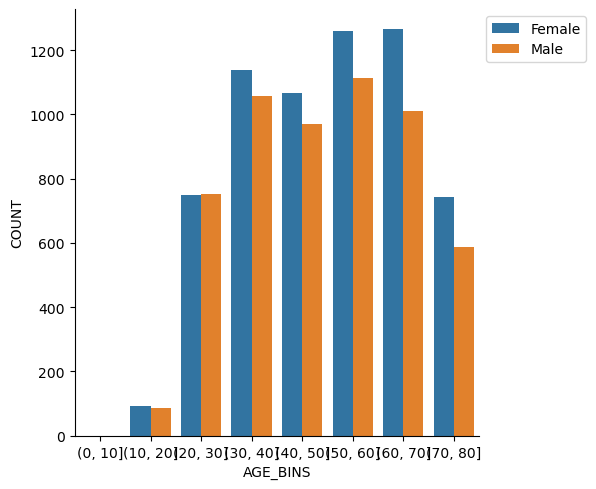

In [442]:
# checking for balance of basic demographic info
age_bins = pd.cut(df['AGE'],bins=np.arange(0,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins,ordered=True)

age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts().unstack().reset_index()
age_counts['AGE_BINS'] = age_counts['AGE_BINS'].astype(str)
age_counts = age_counts.melt(id_vars="AGE_BINS", value_vars=["Female", "Male"], var_name="SEX", value_name="COUNT")

age_sex_plot = sns.catplot(data=age_counts, x="AGE_BINS", y="COUNT", hue="SEX",kind='bar',legend_out=False)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));


<Axes: xlabel='REGION', ylabel='HIPCOST'>

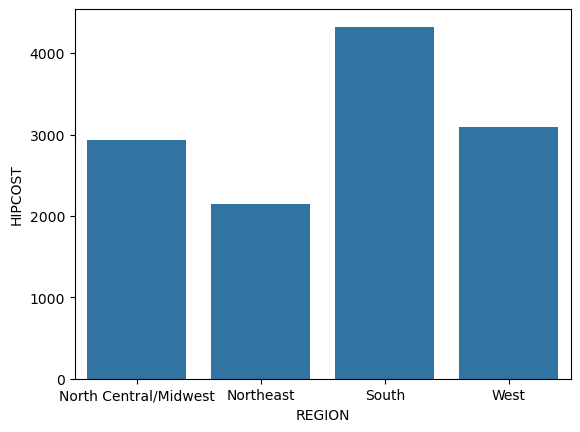

In [ ]:
# checking for balance of basic demographic info
region_counts = df.groupby('REGION',observed=False).count()['HIPCOST']
sns.barplot(region_counts)

<Axes: xlabel='RACENEW', ylabel='HIPCOST'>

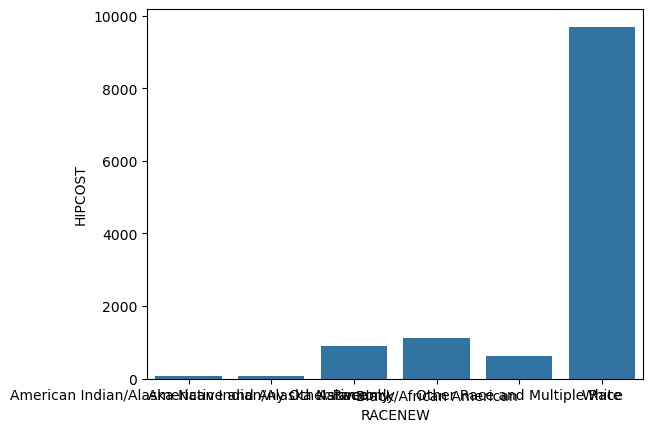

In [ ]:
race_counts = df.groupby('RACENEW',observed=False).count()['HIPCOST']
race_plot = sns.barplot(race_counts)
race_plot.set_x

In [422]:
age_counts_long

,AGE_BINS,SEX,Count
0,"(0, 10]",Female,0
1,"(10, 20]",Female,92
2,"(20, 30]",Female,748
3,"(30, 40]",Female,1138
4,"(40, 50]",Female,1067
5,"(50, 60]",Female,1259
6,"(60, 70]",Female,1265
7,"(70, 80]",Female,742
8,"(0, 10]",Male,0
9,"(10, 20]",Male,87


In [400]:
df.plot(kind='bar',x='AGE',y='HIPCOST')

<Axes: xlabel='AGE'>

Error in callback <function flush_figures at 0x1698c5bc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
for feature in general_demo:
    plt.bar(df[[feature,'HIPCOST']])

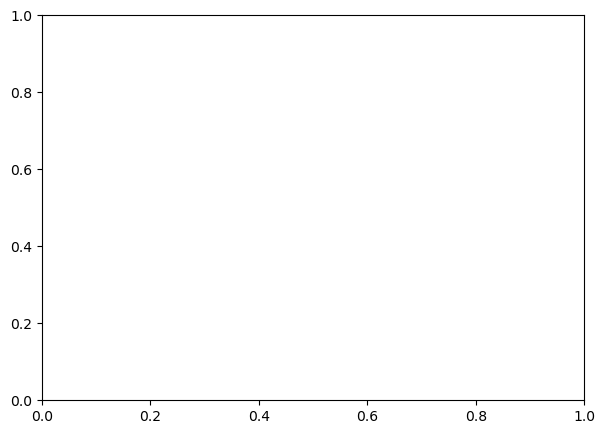

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,5))


KeyError: 'HINOTCOVE'

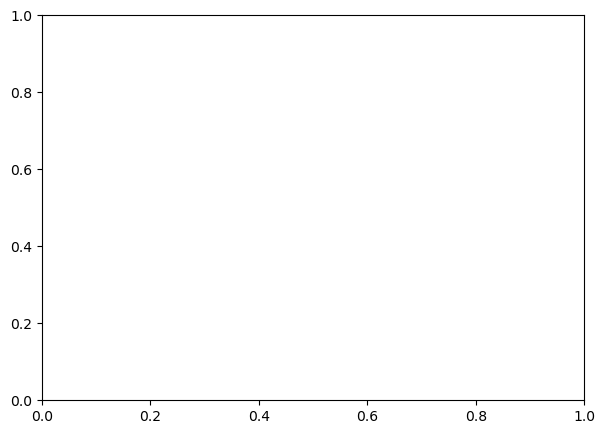

In [ ]:
# plotting how many individuals have each type of insurance plan
fig,ax = plt.subplots(1,1,figsize=(7,5))
plan_types = ['HINOTCOVE','HICHIPE','HIMILITE','HIOTHGOVE','HIMCAIDE','HIMCAREE','HIPRIVATEE','HISTATEE']

plan_type_counts = []
for type in plan_types:
    plan_type_counts.append((df[type]==1).sum())

plt.bar(plan_types,plan_type_counts)

for plan,count in zip(plan_types,plan_type_counts):
    plt.text(plan,count+100,f'{count/num_samples:.2f}%',horizontalalignment='center',verticalalignment='bottom',fontsize=9)

ax.set_xticklabels(labels=plan_types,rotation=90);
ax.set(xlabel='Health Insurance Plan Type',ylabel='Count',title='Distribution of Health Insurance Plan Types');
plt.grid(alpha=0.3)
ax.set_axisbelow(True)

In [ ]:
sum(plan_type_counts)

^^Sum of plan_type_counts is greater than the total number of samples suggesting that individuals can have multiple plan types (e.g., a military-sponsored insurance plan could be a medicare plan)

In [ ]:
age_counts

In [ ]:
age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts()

In [ ]:
# checking for balance of basic demographic info
age_bins = pd.cut(df['AGE'],bins=np.arange(0,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins,ordered=True)

age_counts.stack('SEX')

age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts()
age_plot = sns.barplot(data=age_counts, x='AGE_BINS', y='Female', color='blue', label='Female')
sns.barplot(data=df, x='AGE_BINS', y=age_counts,hue='SEX', color='orange', label='Male', alpha=0.7)


In [ ]:
age_counts.stack('SEX')

In [ ]:
(age_bins.astype(str))[~np.isnan(age_bins)].unique()

In [ ]:
np.sort(age_bins.astype(str).unique())

In [ ]:
age_bins = pd.cut(df['AGE'],bins=np.arange(0,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins, ordered=True)


In [ ]:
plan_types.remove('HISTATEE')

In [ ]:
# insurance plan coverage breakdown by age
fig,axes = plt.subplots(4,2,figsize=(10,10))
axes = axes.ravel()

df['AGE_BINS'] = pd.cut(df['AGE'],bins=np.arange(0,100,10),right=False)

for plan_name,ax in zip(plan_types,axes):
    age_counts = df.groupby('AGE_BINS',observed=False)[plan_name].value_counts().unstack().reset_index()
    ax.bar(age_counts['AGE_BINS'].astype(str),age_counts[1])
    ax.set_xticklabels(labels=age_counts['AGE_BINS'].astype(str),rotation=90)
    ax.set_title(f'{plan_name} counts')

plt.tight_layout()

In [ ]:
# insurance plan coverage breakdown by race
fig,axes = plt.subplots(4,2,figsize=(10,10))
axes = axes.ravel()

for plan_name,ax in zip(plan_types,axes):
    race_counts = df.groupby('RACENEW',observed=False)[plan_name].value_counts().unstack().reset_index()
    ax.bar(race_counts['RACENEW'].astype(str),race_counts[1])
    ax.set_xticklabels(labels=race_counts['RACENEW'].astype(str),rotation=90)
    ax.set_title(f'{plan_name} counts')

plt.tight_layout()